In [20]:
install.packages('QuantPsyc')

Installing package into ‘/home/khanhnd/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [23]:
library(boot, car)

In [24]:
library(QuantPsyc)

Loading required package: MASS

Attaching package: ‘QuantPsyc’

The following object is masked from ‘package:base’:

    norm



In [5]:
album1 = read.delim('data/Album Sales 1.dat', header=TRUE)

In [6]:
albumSales.1 = lm(sales ~ adverts, data=album1, na.action=na.exclude)

In [7]:
summary(albumSales.1)


Call:
lm(formula = sales ~ adverts, data = album1, na.action = na.exclude)

Residuals:
     Min       1Q   Median       3Q      Max 
-152.949  -43.796   -0.393   37.040  211.866 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.341e+02  7.537e+00  17.799   <2e-16 ***
adverts     9.612e-02  9.632e-03   9.979   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 65.99 on 198 degrees of freedom
Multiple R-squared:  0.3346,	Adjusted R-squared:  0.3313 
F-statistic: 99.59 on 1 and 198 DF,  p-value: < 2.2e-16


In [10]:
cor(album1$sales, album1$adverts)

[1] 0.5784877

# 7.8 Multiple regression

In [1]:
album2 = read.delim('data/Album Sales 2.dat', header=TRUE)

In [2]:
head(album2)

adverts,sales,airplay,attract
10.256,330,43,10
985.685,120,28,7
1445.563,360,35,7
1188.193,270,33,7
574.513,220,44,5
568.954,170,19,5


In [3]:
albumSales.2 = lm(sales ~ adverts, data=album2)

In [4]:
albumSales.2


Call:
lm(formula = sales ~ adverts, data = album2)

Coefficients:
(Intercept)      adverts  
  134.13994      0.09612  


In [5]:
summary(albumSales.2)


Call:
lm(formula = sales ~ adverts, data = album2)

Residuals:
     Min       1Q   Median       3Q      Max 
-152.949  -43.796   -0.393   37.040  211.866 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.341e+02  7.537e+00  17.799   <2e-16 ***
adverts     9.612e-02  9.632e-03   9.979   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 65.99 on 198 degrees of freedom
Multiple R-squared:  0.3346,	Adjusted R-squared:  0.3313 
F-statistic: 99.59 on 1 and 198 DF,  p-value: < 2.2e-16


In [6]:
albumSales.3 = lm(sales ~ adverts + airplay + attract, data=album2)

In [7]:
albumSales.3


Call:
lm(formula = sales ~ adverts + airplay + attract, data = album2)

Coefficients:
(Intercept)      adverts      airplay      attract  
  -26.61296      0.08488      3.36743     11.08634  


In [8]:
albumSales.3 = update(albumSales.2, .~. + airplay + attract)
albumSales.3


Call:
lm(formula = sales ~ adverts + airplay + attract, data = album2)

Coefficients:
(Intercept)      adverts      airplay      attract  
  -26.61296      0.08488      3.36743     11.08634  


In [9]:
library(QuantPsyc)

Loading required package: boot
Loading required package: MASS

Attaching package: ‘QuantPsyc’

The following object is masked from ‘package:base’:

    norm



In [10]:
lm.beta(albumSales.3)

adverts   airplay   attract 
0.5108462 0.5119881 0.1916834

In [12]:
confint(albumSales.3)

,2.5 %,97.5 %
(Intercept),-60.82960967,7.60369295
adverts,0.07123166,0.09853799
airplay,2.81962186,3.91522848
attract,6.27855218,15.89411823


In [13]:
anova(albumSales.2, albumSales.3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
198,862264.2,NA,NA,NA,NA
196,434574.6,2,427689.6,96.44738,6.879395e-30


# 7.9 Testing accuracy of regression model

In [2]:
album2 = read.delim('data/Album Sales 2.dat', header=TRUE)
albumSales.3 = lm(sales ~ adverts + airplay + attract, data=album2)

In [4]:
album2$residual = resid(albumSales.3)

In [6]:
album2$standardized.residuals = rstandard(albumSales.3)

In [7]:
album2$large.residual = album2$standardized.residuals > 2 | album2$standardized.residuals < -2

In [9]:
sum(album2$large.residual)

[1] 12

In [17]:
album2[album2$large.residual, c('cooks.')]

,adverts,sales,airplay,attract,residual,standardized.residuals,large.residual
1,10.256,330,43,10,100.07975,2.177404,TRUE
2,985.685,120,28,7,-108.94899,-2.323083,TRUE
10,174.093,300,40,7,99.53375,2.130289,TRUE
47,102.568,40,25,8,-114.96982,-2.460996,TRUE
52,405.913,190,12,4,97.40266,2.099446,TRUE
55,1542.329,190,33,8,-114.12308,-2.455913,TRUE
61,579.321,300,30,7,98.81030,2.104079,TRUE
68,56.895,70,37,7,-110.41564,-2.363549,TRUE
100,1000.000,250,5,7,97.28666,2.095399,TRUE
164,9.104,120,53,8,-121.32405,-2.628814,TRUE


In [31]:
durbinWatsonTest(albumSales.3)

 lag Autocorrelation D-W Statistic p-value
   1       0.0026951      1.949819   0.752
 Alternative hypothesis: rho != 0

In [32]:
vif(albumSales.3)

adverts  airplay  attract 
1.014593 1.042504 1.038455

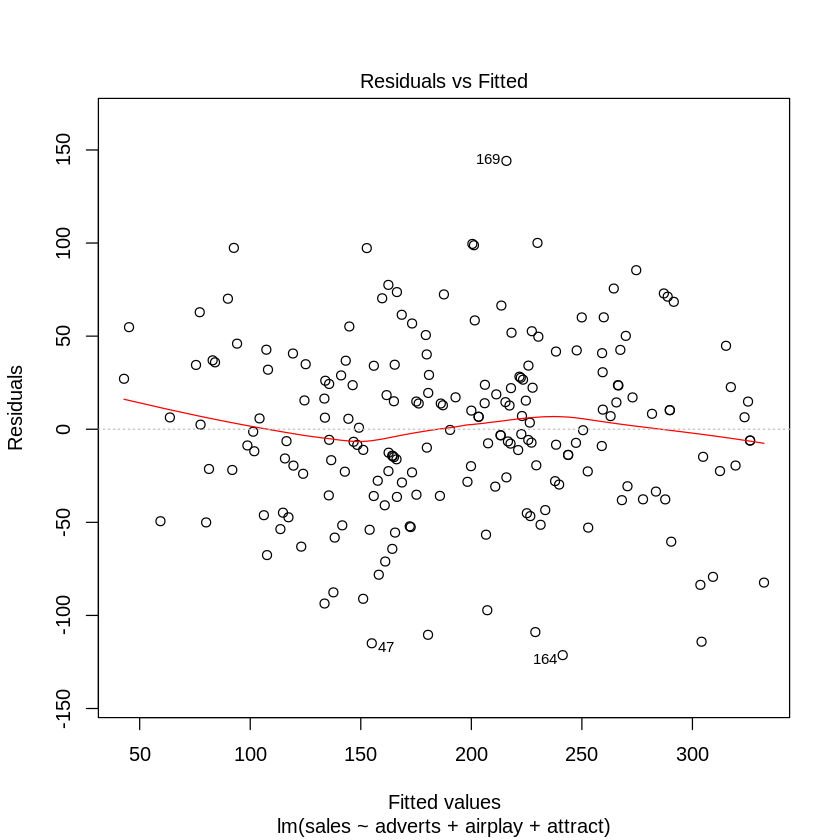

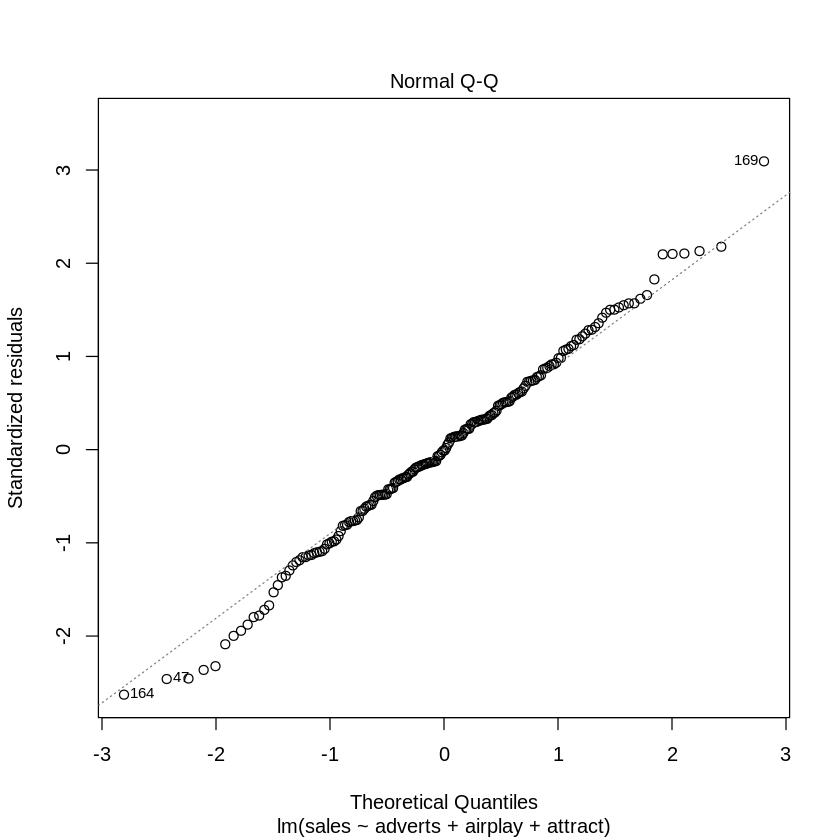

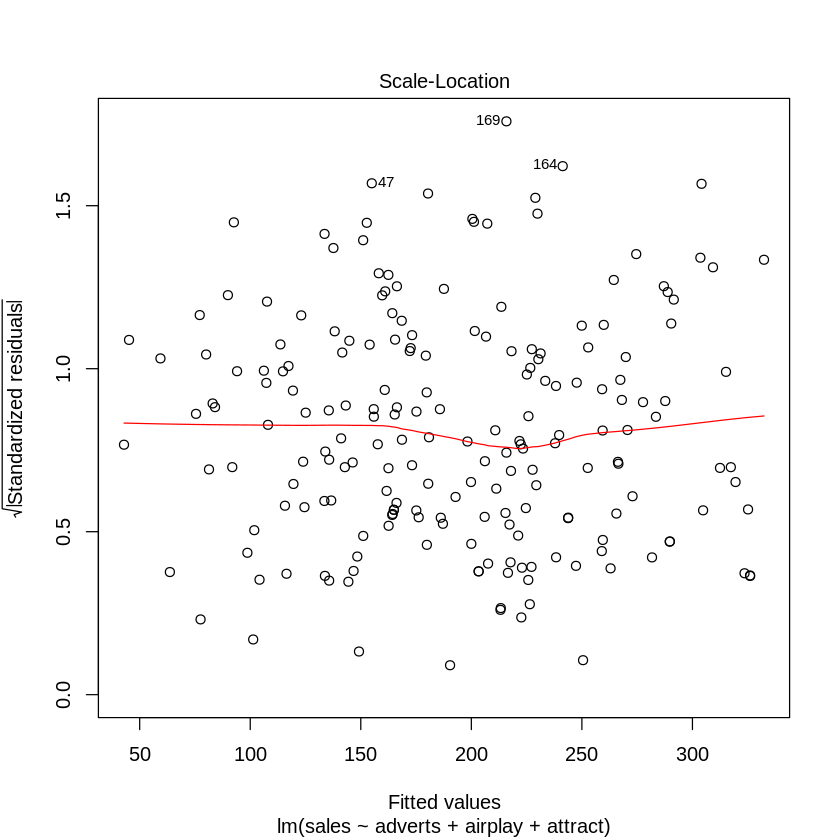

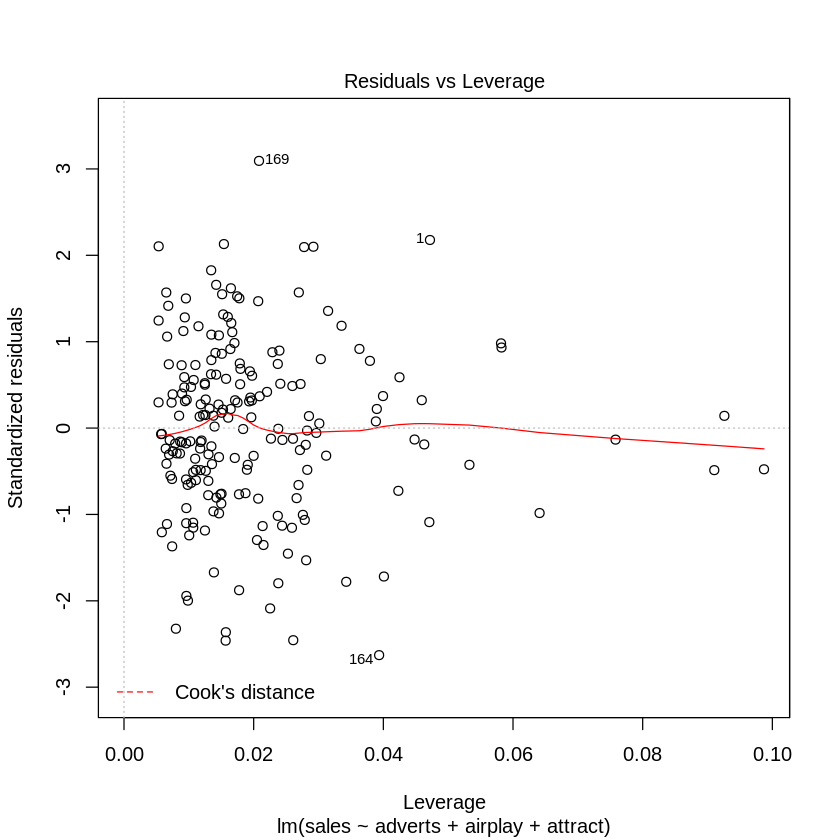

In [33]:
plot(albumSales.3)

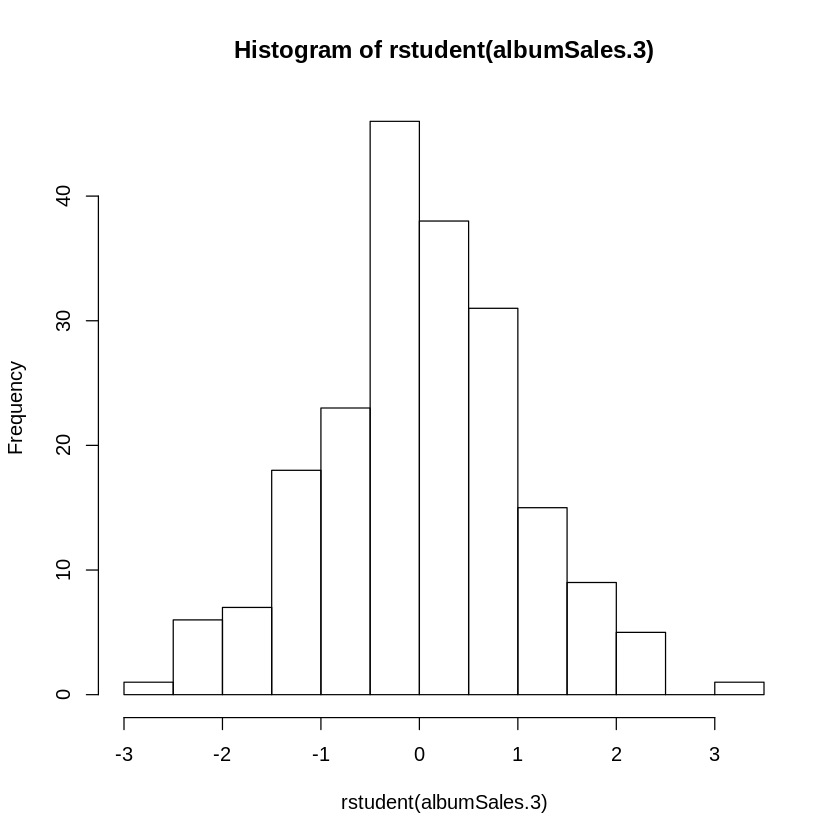

In [36]:
hist(rstudent(albumSales.3))